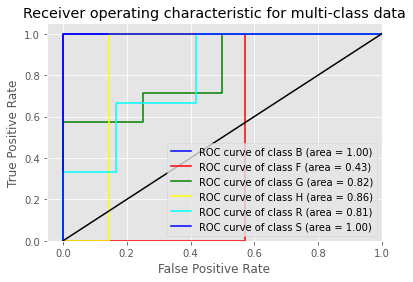

Algoritma: Support Vector Machine
Accuracy Score:  0.3333333333333333
              precision    recall  f1-score   support

           B       1.00      1.00      1.00         1
           F       0.17      1.00      0.29         1
           G       0.00      0.00      0.00         7
           H       0.17      1.00      0.29         1
           R       0.00      0.00      0.00         3
           S       1.00      1.00      1.00         2

    accuracy                           0.33        15
   macro avg       0.39      0.67      0.43        15
weighted avg       0.22      0.33      0.24        15



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title SVM

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import pandas
plt.style.use('ggplot')

# dataframe = pandas.read_csv("dataset.csv", header=None)
dataframe = pandas.read_excel("dataset.xlsx")
dataset = dataframe.values
X = dataset[:,1:1000:].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1
classes = ['B', 'F', 'G', 'H','R','S']
# Binarize the output
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]
# We split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size
= 0.2, random_state=0)
#We define the model as an SVC in OneVsRestClassifier setting.
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True
))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
# We split the data into training and test sets for training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# the model
classifier_svc = svm.SVC(kernel='rbf',random_state=0)
# fit the model using the training set
classifier_svc.fit(X_train, y_train)
# predict the labels/classes of the test set
y_pred = classifier_svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Algoritma: Support Vector Machine')
print('Accuracy Score: ', acc)
print(classification_report(y_test, y_pred))

Algoritma: Decision Tree
Accuracy Score: 0.5
              precision    recall  f1-score   support

           B       0.33      1.00      0.50         1
           F       0.00      0.00      0.00         0
           G       0.20      0.25      0.22         4
           H       0.67      1.00      0.80         4
           R       0.50      0.11      0.18         9
           S       1.00      1.00      1.00         4

    accuracy                           0.50        22
   macro avg       0.45      0.56      0.45        22
weighted avg       0.56      0.50      0.46        22



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarn

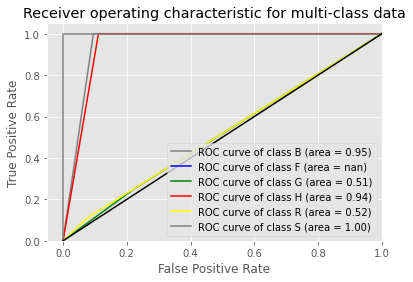

In [15]:
#@title Decision Tree
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report


# load dataset
df= pd.read_excel("dataset.xlsx")
dataset = df.values
X = dataset[:,0:1000:].astype(float)
y = dataset[:,1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Algoritma: Decision Tree')
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
y_score = clf.predict_proba(X_test)
from sklearn.preprocessing import label_binarize

classes = ['B', 'F', 'G', 'H','R','S']
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 6 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]
Algoritma : Naive Bayes
Accuracy Score:  0.9333333333333333
              precision    recall  f1-score   support

           B       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      0.86      0.92         7
           H       1.00      1.00      1.00         1
           R       0.75      1.00      0.86         3
           S       1.00      1.00      1.00         2

    accuracy                           0.93        15
   macro avg       0.96      0.98      0.96        15
weighted avg       0.95      0.93      0.94        15



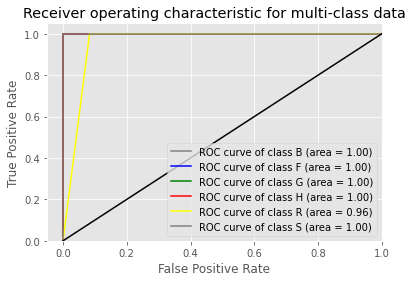

In [ ]:
#@title Naive Bayes
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# dataframe = pandas.read_csv("dataset.csv", header=None)
dataframe = pandas.read_excel("dataset.xlsx")
dataset = dataframe.values
X = dataset[:,0:1000].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1

# membagi dataset menjadi data training dan data testing
# data training sebesar 80%, data testing sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
, random_state=0)

#-----------
# create model 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
clf = model.fit(X_train, y_train)
#------------

y_pred = model.predict(X_test)
# Use score method to get accuracy of the model
#score_te = model.score(X_test, y_test)
#print('Accuracy Score: ', score_te)

cm = confusion_matrix(y_test, y_pred)
print (cm)

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Algoritma : Naive Bayes')
print('Accuracy Score: ', acc)

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize

classes = ['B', 'F', 'G', 'H','R','S']
# Binarize the output
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#@title RNN
# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pandas.read_excel("dataset.xlsx", header=None)
dataset = dataframe.values
X = dataset[:,0:1000].astype(float)
Y = dataset[:,1000]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

# create model
model = Sequential()
model.add(Dense(8, input_dim=1000, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nepochs = 150
nbatch = 5

model.fit(X, dummy_y, epochs=nepochs, batch_size=nbatch)
_, accuracy = model.evaluate(X, dummy_y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
15/15 [==============================] - 0s 2ms/step - loss: 2.9190 - accuracy: 0.1667
Epoch 2/150
15/15 [==============================] - 0s 2ms/step - loss: 1.7435 - accuracy: 0.2361
Epoch 3/150
15/15 [==============================] - 0s 2ms/step - loss: 1.6358 - accuracy: 0.3194
Epoch 4/150
15/15 [==============================] - 0s 2ms/step - loss: 1.4956 - accuracy: 0.2917
Epoch 5/150
15/15 [==============================] - 0s 2ms/step - loss: 1.4075 - accuracy: 0.2917
Epoch 6/150
15/15 [==============================] - 0s 2ms/step - loss: 1.2887 - accuracy: 0.3056
Epoch 7/150
15/15 [==============================] - 0s 2ms/step - loss: 1.2227 - accuracy: 0.3056
Epoch 8/150
15/15 [==============================] - 0s 2ms/step - loss: 1.1994 - accuracy: 0.3611
Epoch 9/150
15/15 [==============================] - 0s 2ms/step - loss: 1.1515 - accuracy: 0.3750
Epoch 10/150
15/15 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.3889
Epoch 11/